In [1]:
import pandas as pd
import re
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
import seaborn as sns

In [2]:
df_all = pd.read_excel('05.dataset.xlsx')

# 면적 전처리
### 1) 면적 log scailing

In [3]:
df_all['log_area'] = np.log(df_all['area(m2)'])

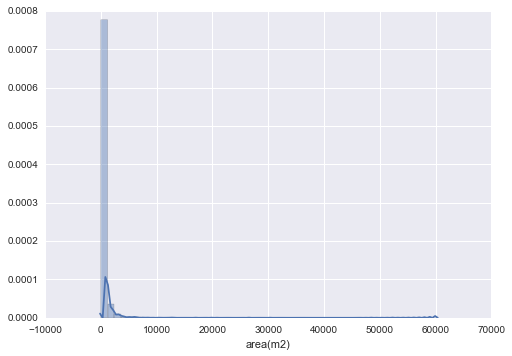

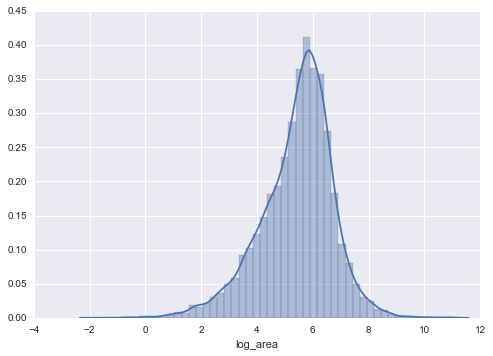

In [4]:
sns.distplot(df_all['area(m2)'])
plt.show();
sns.distplot(df_all['log_area'])
plt.show();

# 가격 전처리
### 1) 감정가, 최저가, 낙찰가 => 평당 가격으로 변환
### 2) 모든 가격 log scailing

In [5]:
df_all['est_jiga'] = df_all['estimated'] / df_all['area(m2)']

In [6]:
df_all['log_est_jiga'] = np.log(df_all['est_jiga'])

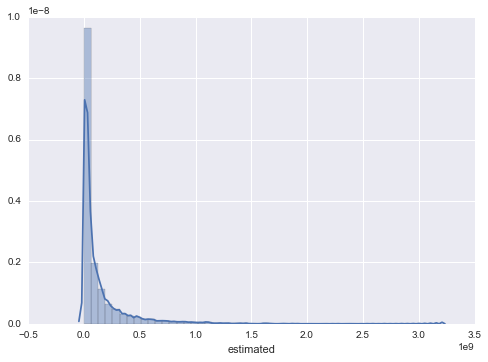

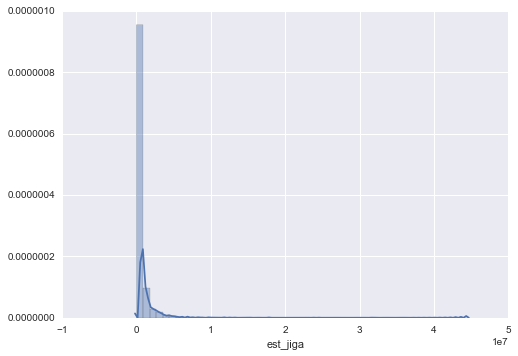

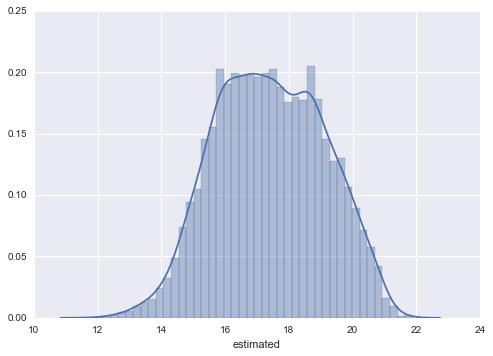

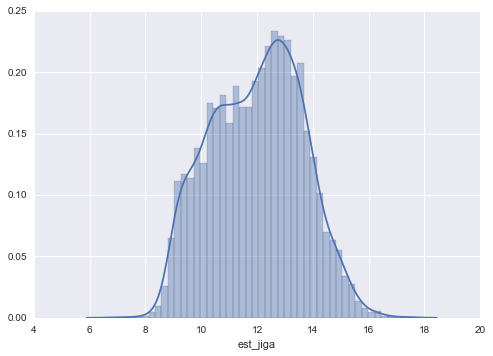

In [7]:
# 감정가 분포 확인

sns.distplot(df_all['estimated'])
plt.show();
sns.distplot(df_all['est_jiga'])
plt.show();
sns.distplot(np.log(df_all['estimated']))
plt.show();
sns.distplot(np.log(df_all['est_jiga']))
plt.show();

In [8]:
df_all['bid_jiga'] = df_all['bid'] / df_all['area(m2)']

In [9]:
df_all['log_bid_jiga'] = np.log(df_all['bid_jiga'])

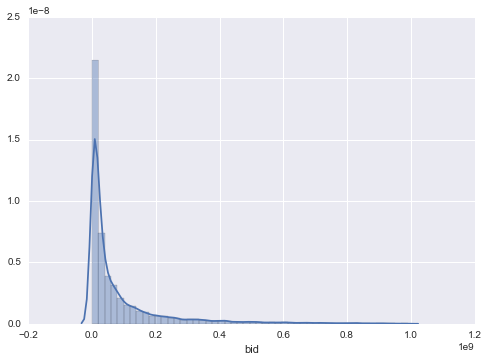

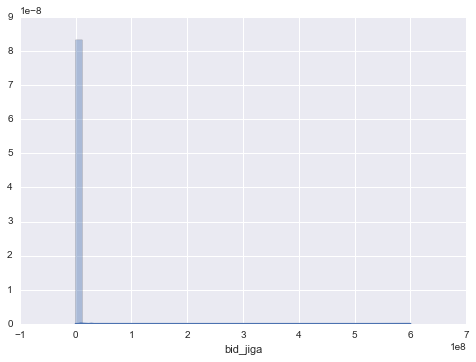

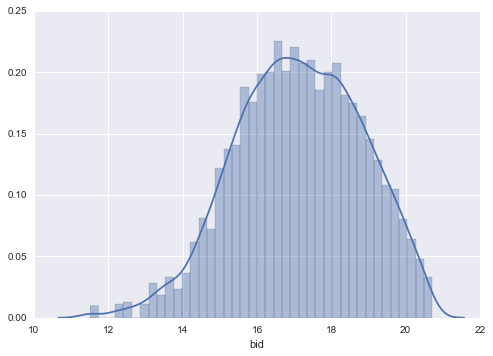

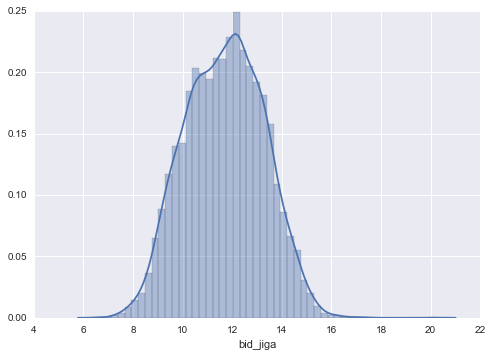

In [10]:
# 낙찰가 분포 확인

sns.distplot(df_all['bid'])
plt.show();
sns.distplot(df_all['bid_jiga'])
plt.show();
sns.distplot(np.log(df_all['bid']))
plt.show();
sns.distplot(np.log(df_all['bid_jiga']))
plt.show();

In [11]:
df_all['min_jiga'] = df_all['min_price'] / df_all['area(m2)']

In [12]:
df_all['log_min_jiga'] = np.log(df_all['min_jiga'])

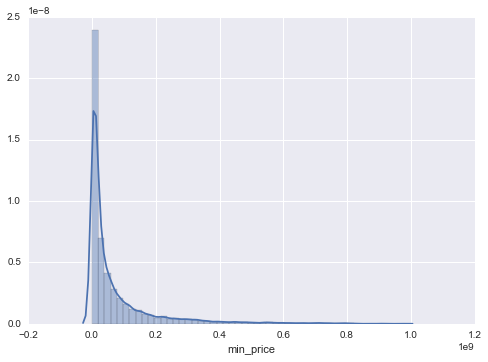

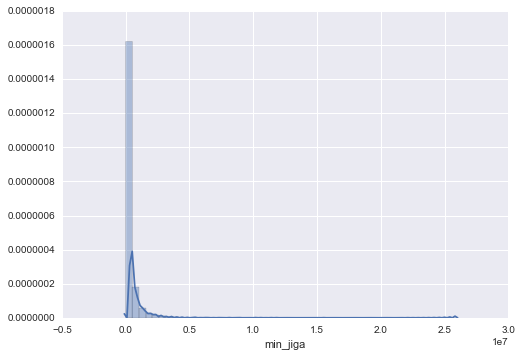

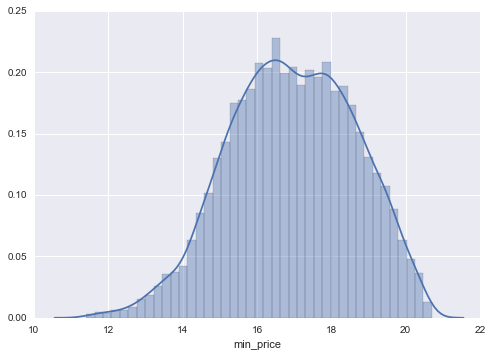

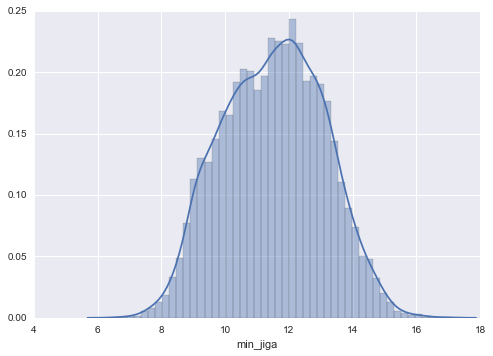

In [13]:
# 최저가 분포 확인

sns.distplot(df_all['min_price'])
plt.show();
sns.distplot(df_all['min_jiga'])
plt.show();
sns.distplot(np.log(df_all['min_price']))
plt.show();
sns.distplot(np.log(df_all['min_jiga']))
plt.show();

# 토지 방향 및 형태
### 1) lndlevel, rdtuch, lndcmps, lndfrm => OneHotEncoding

In [14]:
df_all = df_all.fillna('0')

In [15]:
# 토지 방향 및 형태에 대한 정보가 없는 경우 모든 feature column 값 = 0

df_lnd = pd.get_dummies(df_all.ix[:,'lndlevel':'lndfrm']).drop(['lndlevel_0', 'rdtuch_0', 'lndcmps_0', 'lndfrm_0'],axis = 1)

In [16]:
df_lnd

,lndlevel_고지,lndlevel_급경사,lndlevel_완경사,lndlevel_저지,lndlevel_평지,rdtuch_광대세각,rdtuch_광대소각,rdtuch_광대한면,rdtuch_맹지,rdtuch_세각(가),...,lndcmps_북향,lndcmps_서향,lndfrm_가장형,lndfrm_부정형,lndfrm_사다리,lndfrm_삼각형,lndfrm_세장형,lndfrm_역삼각,lndfrm_자루형,lndfrm_정방형
0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
6,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


# 권리문제 전처리
### 1) right => OneHotEncoding

In [17]:
# 토지 권리 최대 개수는?

a = np.zeros(len(df_all['right']))
for i in range(len(df_all['right'])):
    a[i] = len(df_all['right'][i].split("\xa0\xa0"))
a.max()

4.0

In [18]:
df_all['right1'] = '0'
df_all['right2'] = '0'
df_all['right3'] = '0'
df_all['right4'] = '0'

for i in range(len(df_all['right'])):
    for j in range(len(df_all['right'][i].split("\xa0\xa0"))):
        df_all.ix[i, 'right{number}'.format(number = j+1)] = df_all['right'][i].split("\xa0\xa0")[j]

In [19]:
right_all = pd.concat([df_all['right1'], df_all['right2'],
                      df_all['right3'], df_all['right4']])

In [20]:
le = LabelEncoder()
le.fit(right_all.unique())
for i in range(len(right_all.unique())):
    print(i, le.classes_[i])

0 0
1 공유자매수신고
2 법정지상권
3 분묘기지권
4 선순위가등기
5 선순위가처분
6 선순위전세권
7 선순위지상권
8 유치권
9 재경매
10 지분경매


In [21]:
for i in range(4):
    df_all.ix[:, 'right{num}'.format(num = i+1)] = le.transform(df_all.ix[:, 'right{num}'.format(num = i+1)]).reshape(-1,1)

In [22]:
ohe = OneHotEncoder()
ohe.fit(np.arange(len(le.classes_)).reshape(-1, 1))

OneHotEncoder(categorical_features='all', dtype=<class 'float'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [23]:
ohe_result = ohe.transform(np.array(df_all.ix[:, 'right1']).reshape(-1,1)).toarray()
for i in range(2, 5):
    ohe_result = ohe_result + ohe.transform(np.array(df_all.ix[:, 'right{num}'.format(num = i)]).reshape(-1,1)).toarray()

In [24]:
df_right = pd.DataFrame(ohe_result, columns = le.classes_)
df_right = df_right.drop('0', axis = 1)

In [25]:
df_right.head()

,공유자매수신고,법정지상권,분묘기지권,선순위가등기,선순위가처분,선순위전세권,선순위지상권,유치권,재경매,지분경매
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# 단독필지 or 분할필지
### 1) etc = 0 : 단독필지
### 2) etc !=0 : 분할필지

In [26]:
df_all['lot_of_land'] = 0
for i in range(len(df_all['etc'])):
    if df_all['etc'][i] != '0':
        df_all.ix[i, 'lot_of_land'] = 1

In [27]:
df_all['lot_of_land'].tail()

9956    1
9957    0
9958    1
9959    0
9960    1
Name: lot_of_land, dtype: int64

# 용도지역 전처리 (시군구 지역별 필지 개수)
### 1) 도시지역_주거지역
### 2) 도시지역_상업지역
### 3) 도시지역_공업지역
### 4) 도시지역_녹지지역
### 5) 도시지역_개발제한구역
### 6) 도시지역_용도미지정
### 7) 도시지역_관리지역
### 8) 농림지역
### 9) 자연환경보전지역

In [28]:
df_all['도시지역_상업지역'][df_all['도시지역_상업지역'] == '-'] = 0 
df_all['도시지역_공업지역'][df_all['도시지역_공업지역'] == '-'] = 0
df_all['도시지역_녹지지역'][df_all['도시지역_녹지지역'] == '-'] = 0
df_all['도시지역_개발제한구역'][df_all['도시지역_개발제한구역'] == '-'] = 0
df_all['도시지역_용도미지정'][df_all['도시지역_용도미지정'] == '-'] = 0
df_all['관리지역소계'][df_all['관리지역소계'] == '-'] = 0
df_all['농림지역'][df_all['농림지역'] == '-'] = 0
df_all['자연환경보전지역'][df_all['자연환경보전지역'] == '-'] = 0 

C:\Users\LGPC\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':
C:\Users\LGPC\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  from ipykernel import kernelapp as app
C:\Users\LGPC\Anaconda3\lib\site-packages\ipykernel\__main__.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  app.launch_new_instance()
C:\Users\LGPC\Anaconda3\lib\site-packages\ipykernel\__main_

# 해당토지의 규제 법규
### 1) 국토계획 및 이용
### 2) 기타 법령
### 3) 시행령
### 4) 토지이용규제 기본법

In [29]:
pat = re.compile('(\w+\s*\w+)(\W+.+)*')

In [30]:
for i in df_all.ix[:, 'nearlaw1':'nearlaw20'].columns:
    df_all.ix[df_all[i] == 0, i] = '0'
    df_all.ix[df_all[i] == 0.0, i] = '0'
    df_all.ix[df_all[i] == '.', i] = '0'

In [31]:
for i in range(len(df_all['nearlaw1'])):
    for j in df_all.ix[:, 'nearlaw1':'nearlaw20'].columns:
        if df_all.ix[i, j] == '0':
            pass
        else:
            df_all.ix[i, j] = pat.findall(df_all.ix[i, j])[0][0]

In [32]:
#       경관광장, 경관녹지, 경관지구, 경관지구기타, 시가지경관지구, 수변경관지구, 자연경관지구, 중점경관관리구역, 제1종자연경관지구, 공원자연보존지구, 공원자연환경지구
#       공공공지, 공공문화체육시설미분류, 공공시설구역, 공공시설용지, 공공청사
#       과밀억제권역, 과밀억제지역, 
#       공원, 공원마을지구, 국립공원, 군립공원, 근린공원, 기타공원시설, 도립공원, 도시자연공원, 도시자연공원구역, 소공원, 어린이공원, 체육공원
#       공익용산지, 임업용산지, 보전산지, 보전임지, 산림보호구역
#       관광지, 관광지기타, 관광휴양개발진흥지구,
#       광로1류, 광로2류, 광로3류, 
#       녹지, 녹지구역, 녹지용지, 녹지지역, 보전녹지지역, 생산녹지지역, 완충녹지
#       농업보호구역, 농업생산기반 정비사업지역, 농업진흥구역, 농업진흥지역, 
#       대로1류, 대로2류, 대로3류,
#       도로, 도로구역,
#       도시개발구역, 도시계획구역
#       문화재, 문화재보존영향 검토대상구역, 문화재보호구역, 문화재자료구역, 국가지정문화재구역, 등록문화재구역, 시도지정문화재구역, 지정문화재구역, 역사문화환경 보존육성지구, 역사문화환경 특별보존지구, 역사문화환경보존지구, 역사문화환경보존지역
#       비행안전구역, 비행안전제2구역, 비행안전제3구역, 비행안전제4구역, 비행안전제5구역, 비행안전제6구역, 
#       상대정화구역, 절대정화구역, 학교, 학교환경위생 정화구역
#       성장관리권역, 성장관리지역
#       소로1류, 소로2류, 소로3류
#       소하천, 소하천구역, 소하천기타, 소하천예정지,
#       수변구역, 수산자원보호구역, 수질보전특별대책지역, 수질오염방지시설, 
#       입엄생산용지, 임업용산지, 임업진흥권역, 임업진흥촉진지역
#       재정비촉진지구, 재정비촉진지구기타
#       제1종일반주거지역, 제2종일반주거지역, 제1종전용주거지역, 제2종전용주거지역, 제3종일반주거지역, 주거지역
#       제1종지구단위계획구역, 제2종지구단위계획구역, 지구단위계획구역
#       중로1류, 중로2류, 중로3류
#       하천, 하천구역
#       공업용지, 일반공업지역, 전용공업지역, 준공업지역, 공장설립승인지역
#       국가산업단지, 산업개발진흥지구, 산업시설구역, 일반산업단지, 지방산업단지
#       근린상업지역, 상업용지, 상업지역, 유통상업지역, 일반상업지역, 중심상업지역, 
#       개발진흥지구, 개발촉진지구, 도시개발구역, 재개발구역, 지역개발사업구역, 
#       주거개발진흥지구, 주거환경개선지구, 
# 제거 : 그 외 100개 이하# 제거 : 그 외 100개 이하

In [33]:
# 취합 :
for i in df_all.ix[:, 'nearlaw1':'nearlaw20'].columns:
#       가축사육제한구역, 가축사육제한구역기타
    df_all.ix[df_all.ix[:, i] == '가축사육제한구역기타', i] = '가축사육제한구역'
#       개발제한구역, 개발행위허가제한지역
    df_all.ix[df_all.ix[:, i] == '개발행위허가제한지역', i] = '개발제한구역'
#       경관광장, 경관녹지, 경관지구, 경관지구기타, 시가지경관지구, 수변경관지구,
#       자연경관지구, 중점경관관리구역, 제1종자연경관지구, 공원자연보존지구,
#       공원자연환경지구
    df_all.ix[df_all.ix[:, i] == '경관광장', i] = '경관보전관련지역'
    df_all.ix[df_all.ix[:, i] == '경관녹지', i] = '경관보전관련지역'
    df_all.ix[df_all.ix[:, i] == '경관지구', i] = '경관보전관련지역'
    df_all.ix[df_all.ix[:, i] == '경관지구기타', i] = '경관보전관련지역'
    df_all.ix[df_all.ix[:, i] == '시가지경관지구', i] = '경관보전관련지역'
    df_all.ix[df_all.ix[:, i] == '시가지경관지구', i] = '경관보전관련지역'
    df_all.ix[df_all.ix[:, i] == '수변경관지구', i] = '경관보전관련지역'
    df_all.ix[df_all.ix[:, i] == '자연경관지구', i] = '경관보전관련지역'
    df_all.ix[df_all.ix[:, i] == '중점경관관리구역', i] = '경관보전관련지역'
    df_all.ix[df_all.ix[:, i] == '제1종자연경관지구', i] = '경관보전관련지역'
    df_all.ix[df_all.ix[:, i] == '공원자연보존지구', i] = '경관보전관련지역'
    df_all.ix[df_all.ix[:, i] == '공원자연환경지구', i] = '경관보전관련지역'
#       공공공지, 공공문화체육시설미분류, 공공시설구역, 공공시설용지, 공공청사
    df_all.ix[df_all.ix[:, i] == '공공공지', i] = '공공시설유무'
    df_all.ix[df_all.ix[:, i] == '공공문화체육시설미분류', i] = '공공시설유무'
    df_all.ix[df_all.ix[:, i] == '공공시설구역', i] = '공공시설유무'
    df_all.ix[df_all.ix[:, i] == '공공시설용지', i] = '공공시설유무'
    df_all.ix[df_all.ix[:, i] == '공공청사', i] = '공공시설유무'
#       과밀억제권역, 과밀억제지역, 
    df_all.ix[df_all.ix[:, i] == '과밀억제권역', i] = '과밀억제지역'
#       공원, 공원마을지구, 국립공원, 군립공원, 근린공원, 기타공원시설, 도립공원, 
#       도시자연공원, 도시자연공원구역, 소공원, 어린이공원, 체육공원
    df_all.ix[df_all.ix[:, i] == '공원', i] = '공원유무'
    df_all.ix[df_all.ix[:, i] == '공원마을지구', i] = '공원유무'
    df_all.ix[df_all.ix[:, i] == '국립공원', i] = '공원유무'
    df_all.ix[df_all.ix[:, i] == '군립공원', i] = '공원유무'
    df_all.ix[df_all.ix[:, i] == '근린공원', i] = '공원유무'
    df_all.ix[df_all.ix[:, i] == '기타공원시설', i] = '공원유무'
    df_all.ix[df_all.ix[:, i] == '도립공원', i] = '공원유무'
    df_all.ix[df_all.ix[:, i] == '도시자연공원', i] = '공원유무'
    df_all.ix[df_all.ix[:, i] == '도시자연공원구역', i] = '공원유무'
    df_all.ix[df_all.ix[:, i] == '소공원', i] = '공원유무'
    df_all.ix[df_all.ix[:, i] == '어린이공원', i] = '공원유무'
    df_all.ix[df_all.ix[:, i] == '체육공원', i] = '공원유무'
#       공익용산지, 임업용산지, 보전산지, 보전임지, 산림보호구역
    df_all.ix[df_all.ix[:, i] == '공익용산지', i] = '산지관련법규'
    df_all.ix[df_all.ix[:, i] == '임업용산지', i] = '산지관련법규'
    df_all.ix[df_all.ix[:, i] == '보전산지', i] = '산지관련법규'
    df_all.ix[df_all.ix[:, i] == '보전임지', i] = '산지관련법규'
    df_all.ix[df_all.ix[:, i] == '산림보호구역', i] = '산지관련법규'
#       관광지, 관광지기타, 관광휴양개발진흥지구,
    df_all.ix[df_all.ix[:, i] == '관광지기타', i] = '관광지'
    df_all.ix[df_all.ix[:, i] == '관광휴양개발진흥지구', i] = '산지관련법규'
#       광로1류, 광로2류, 광로3류, 
    df_all.ix[df_all.ix[:, i] == '광로1류', i] = '광로'
    df_all.ix[df_all.ix[:, i] == '광로2류', i] = '광로'
    df_all.ix[df_all.ix[:, i] == '광로3류', i] = '광로'
#       녹지, 녹지구역, 녹지용지, 녹지지역, 보전녹지지역, 생산녹지지역, 완충녹지
    df_all.ix[df_all.ix[:, i] == '녹지', i] = '녹지관련지역'
    df_all.ix[df_all.ix[:, i] == '녹지구역', i] = '녹지관련지역'
    df_all.ix[df_all.ix[:, i] == '녹지용지', i] = '녹지관련지역'
    df_all.ix[df_all.ix[:, i] == '녹지지역', i] = '녹지관련지역'
    df_all.ix[df_all.ix[:, i] == '보전녹지지역', i] = '녹지관련지역'
    df_all.ix[df_all.ix[:, i] == '생산녹지지역', i] = '녹지관련지역'
    df_all.ix[df_all.ix[:, i] == '완충녹지', i] = '녹지관련지역'
#       농업보호구역, 농업생산기반 정비사업지역, 농업진흥구역, 농업진흥지역, 
    df_all.ix[df_all.ix[:, i] == '농업보호구역', i] = '농업관련지역'
    df_all.ix[df_all.ix[:, i] == '농업생산기반 정비사업지역', i] = '농업관련지역'
    df_all.ix[df_all.ix[:, i] == '농업진흥구역', i] = '농업관련지역'
    df_all.ix[df_all.ix[:, i] == '농업진흥지역', i] = '농업관련지역'
#       대로1류, 대로2류, 대로3류,
    df_all.ix[df_all.ix[:, i] == '대로1류', i] = '대로'
    df_all.ix[df_all.ix[:, i] == '대로2류', i] = '대로'
    df_all.ix[df_all.ix[:, i] == '대로3류', i] = '대로'
#       도로, 도로구역,
    df_all.ix[df_all.ix[:, i] == '도로', i] = '도로유무'
    df_all.ix[df_all.ix[:, i] == '도로구역', i] = '도로유무'
#       도시개발구역, 도시계획구역
    df_all.ix[df_all.ix[:, i] == '도시개발구역', i] = '도시개발관련지역'
    df_all.ix[df_all.ix[:, i] == '도시계획구역', i] = '도시개발관련지역'
#       문화재, 문화재보존영향 검토대상구역, 문화재보호구역, 문화재자료구역, 
#       국가지정문화재구역, 등록문화재구역, 시도지정문화재구역, 지정문화재구역, 
#       역사문화환경 보존육성지구, 역사문화환경 특별보존지구, 역사문화환경보존지구, 
#       역사문화환경보존지역
    df_all.ix[df_all.ix[:, i] == '문화재', i] = '문화재관련법규'
    df_all.ix[df_all.ix[:, i] == '문화재보존영향 검토대상구역', i] = '문화재관련법규'
    df_all.ix[df_all.ix[:, i] == '문화재보호구역', i] = '문화재관련법규'
    df_all.ix[df_all.ix[:, i] == '문화재자료구역', i] = '문화재관련법규'
    df_all.ix[df_all.ix[:, i] == '국가지정문화재구역', i] = '문화재관련법규'
    df_all.ix[df_all.ix[:, i] == '등록문화재구역', i] = '문화재관련법규'
    df_all.ix[df_all.ix[:, i] == '시도지정문화재구역', i] = '문화재관련법규'
    df_all.ix[df_all.ix[:, i] == '지정문화재구역', i] = '문화재관련법규'
    df_all.ix[df_all.ix[:, i] == '역사문화환경 보존육성지구', i] = '문화재관련법규'
    df_all.ix[df_all.ix[:, i] == '역사문화환경 특별보존지구', i] = '문화재관련법규'
    df_all.ix[df_all.ix[:, i] == '역사문화환경보존지구', i] = '문화재관련법규'
    df_all.ix[df_all.ix[:, i] == '역사문화환경보존지역', i] = '문화재관련법규'
#       비행안전구역, 비행안전제2구역, 비행안전제3구역, 비행안전제4구역, 
#       비행안전제5구역, 비행안전제6구역, 
    df_all.ix[df_all.ix[:, i] == '비행안전제2구역', i] = '비행안전구역'
    df_all.ix[df_all.ix[:, i] == '비행안전제3구역', i] = '비행안전구역'
    df_all.ix[df_all.ix[:, i] == '비행안전제4구역', i] = '비행안전구역'
    df_all.ix[df_all.ix[:, i] == '비행안전제5구역', i] = '비행안전구역'
    df_all.ix[df_all.ix[:, i] == '비행안전제6구역', i] = '비행안전구역'
#       상대정화구역, 절대정화구역, 학교, 초등학교, 학교환경위생 정화구역
    df_all.ix[df_all.ix[:, i] == '상대정화구역', i] = '정화구역'
    df_all.ix[df_all.ix[:, i] == '절대정화구역', i] = '정화구역'
    df_all.ix[df_all.ix[:, i] == '학교', i] = '정화구역'
    df_all.ix[df_all.ix[:, i] == '초등학교', i] = '정화구역'
    df_all.ix[df_all.ix[:, i] == '학교환경위생 정화구역', i] = '정화구역'
#       성장관리권역, 성장관리지역
    df_all.ix[df_all.ix[:, i] == '성장관리권역', i] = '성장관리지역'
#       소로1류, 소로2류, 소로3류
    df_all.ix[df_all.ix[:, i] == '소로1류', i] = '소로'
    df_all.ix[df_all.ix[:, i] == '소로2류', i] = '소로'
    df_all.ix[df_all.ix[:, i] == '소로3류', i] = '소로'
#       소하천, 소하천구역, 소하천기타, 소하천예정지,
#       하천, 하천구역, 국가하천, 지방1급하천, 지방2급하천
    df_all.ix[df_all.ix[:, i] == '소하천', i] = '하천유무'
    df_all.ix[df_all.ix[:, i] == '소하천구역', i] = '하천유무'
    df_all.ix[df_all.ix[:, i] == '소하천기타', i] = '하천유무'
    df_all.ix[df_all.ix[:, i] == '소하천예정지', i] = '하천유무'
    df_all.ix[df_all.ix[:, i] == '하천', i] = '하천유무'
    df_all.ix[df_all.ix[:, i] == '하천구역', i] = '하천유무'
    df_all.ix[df_all.ix[:, i] == '국가하천', i] = '하천유무'
    df_all.ix[df_all.ix[:, i] == '지방1급하천', i] = '하천유무'
    df_all.ix[df_all.ix[:, i] == '지방2급하천', i] = '하천유무'    
#       수변구역, 수산자원보호구역, 수질보전특별대책지역, 수질오염방지시설,
#       지하수자원특별관리구역
    df_all.ix[df_all.ix[:, i] == '수변구역', i] = '수질보존관련지역'
    df_all.ix[df_all.ix[:, i] == '수산자원보호구역', i] = '수질보존관련지역'
    df_all.ix[df_all.ix[:, i] == '수질보전특별대책지역', i] = '수질보존관련지역'
    df_all.ix[df_all.ix[:, i] == '수질오염방지시설', i] = '수질보존관련지역'
    df_all.ix[df_all.ix[:, i] == '지하수자원특별관리구역', i] = '수질보존관련지역'
#       입엄생산용지, 임업용산지, 임업진흥권역, 임업진흥촉진지역
    df_all.ix[df_all.ix[:, i] == '임업생산용지', i] = '임업관련지역'
    df_all.ix[df_all.ix[:, i] == '임업용산지', i] = '임업관련지역'
    df_all.ix[df_all.ix[:, i] == '임업진흥권역', i] = '임업관련지역'
    df_all.ix[df_all.ix[:, i] == '임업진흥촉진지역', i] = '임업관련지역'
#       재정비촉진지구, 재정비촉진지구기타, 재개발구역, 지역개발사업구역, 개발진흥지구,
#       개발촉진지구, 도시개발구역
    df_all.ix[df_all.ix[:, i] == '재정비촉진지구', i] = '개발촉진관련지역'
    df_all.ix[df_all.ix[:, i] == '재정비촉진지구기타', i] = '개발촉진관련지역'
    df_all.ix[df_all.ix[:, i] == '재개발구역', i] = '개발촉진관련지역'
    df_all.ix[df_all.ix[:, i] == '지역개발사업구역', i] = '개발촉진관련지역'
    df_all.ix[df_all.ix[:, i] == '개발진흥지구', i] = '개발촉진관련지역'
    df_all.ix[df_all.ix[:, i] == '개발촉진지구', i] = '개발촉진관련지역'
    df_all.ix[df_all.ix[:, i] == '도시개발구역', i] = '개발촉진관련지역'
#       제1종일반주거지역, 제2종일반주거지역, 제1종전용주거지역, 제2종전용주거지역, 
#       제3종일반주거지역, 주거지역
    df_all.ix[df_all.ix[:, i] == '제1종일반주거지역', i] = '주거관련지역'
    df_all.ix[df_all.ix[:, i] == '제2종일반주거지역', i] = '주거관련지역'
    df_all.ix[df_all.ix[:, i] == '제1종전용주거지역', i] = '주거관련지역'
    df_all.ix[df_all.ix[:, i] == '제2종전용주거지역', i] = '주거관련지역'
    df_all.ix[df_all.ix[:, i] == '제3종일반주거지역', i] = '주거관련지역'
    df_all.ix[df_all.ix[:, i] == '주거지역', i] = '주거관련지역'
#       제1종지구단위계획구역, 제2종지구단위계획구역, 지구단위계획구역
    df_all.ix[df_all.ix[:, i] == '제1종지구단위계획구역', i] = '지구단위계획구역'
    df_all.ix[df_all.ix[:, i] == '제2종지구단위계획구역', i] = '지구단위계획구역'
#       중로1류, 중로2류, 중로3류
    df_all.ix[df_all.ix[:, i] == '중로1류', i] = '중로'
    df_all.ix[df_all.ix[:, i] == '중로2류', i] = '중로'
    df_all.ix[df_all.ix[:, i] == '중로3류', i] = '중로'
#       공업용지, 일반공업지역, 전용공업지역, 준공업지역, 공장설립승인지역
    df_all.ix[df_all.ix[:, i] == '공업용지', i] = '공업관련지역'
    df_all.ix[df_all.ix[:, i] == '일반공업지역', i] = '공업관련지역'
    df_all.ix[df_all.ix[:, i] == '전용공업지역', i] = '공업관련지역'
    df_all.ix[df_all.ix[:, i] == '준공업지역', i] = '공업관련지역'
    df_all.ix[df_all.ix[:, i] == '공장설립승인지역', i] = '공업관련지역'
#       국가산업단지, 산업개발진흥지구, 산업시설구역, 일반산업단지, 지방산업단지
    df_all.ix[df_all.ix[:, i] == '국가산업단지', i] = '산업관련지역'
    df_all.ix[df_all.ix[:, i] == '산업개발진흥지구', i] = '산업관련지역'
    df_all.ix[df_all.ix[:, i] == '산업시설구역', i] = '산업관련지역'
    df_all.ix[df_all.ix[:, i] == '일반산업단지', i] = '산업관련지역'
    df_all.ix[df_all.ix[:, i] == '지방산업단지', i] = '산업관련지역'
#       근린상업지역, 상업용지, 상업지역, 유통상업지역, 일반상업지역, 중심상업지역, 
    df_all.ix[df_all.ix[:, i] == '근린상업지역', i] = '상업관련지역'
    df_all.ix[df_all.ix[:, i] == '상업용지', i] = '상업관련지역'
    df_all.ix[df_all.ix[:, i] == '상업지역', i] = '상업관련지역'
    df_all.ix[df_all.ix[:, i] == '유통상업지역', i] = '상업관련지역'
    df_all.ix[df_all.ix[:, i] == '일반상업지역', i] = '상업관련지역'
    df_all.ix[df_all.ix[:, i] == '중심상업지역', i] = '상업관련지역'
#       주거개발진흥지구, 주거환경개선지구, 
    df_all.ix[df_all.ix[:, i] == '주거개발진흥지구', i] = '주거개발관련지역'
    df_all.ix[df_all.ix[:, i] == '주거환경개선지구', i] = '주거개발관련지역'
# 제거 : 그 외 100개 이하

In [34]:
for i in range(len(df_all.ix[:, 'nearlaw1'])):
    for j in range(len(df_all.ix[:, 'nearlaw1':'nearlaw20'].columns)):
        if df_all.ix[i, 'nearlaw1':'nearlaw20'].duplicated()[j] == True:
            df_all.ix[i, 'nearlaw{num}'.format(num = j+1)] = '0'

In [35]:
all_law = df_all.ix[:, 'nearlaw1']
for i in df_all.ix[:, 'nearlaw2':'nearlaw20'].columns:
    all_law = np.hstack([all_law, df_all.ix[:, i]])
all_law = pd.Series(all_law)

In [36]:
le = LabelEncoder()
le.fit(all_law.unique())

LabelEncoder()

In [37]:
for i in df_all.ix[:, 'nearlaw1':'nearlaw20'].columns:
    df_all.ix[:, i] = le.transform(df_all.ix[:, i]).reshape(-1, 1)

In [38]:
ohe = OneHotEncoder()
ohe.fit(np.arange(len(le.classes_)).reshape(-1, 1))

OneHotEncoder(categorical_features='all', dtype=<class 'float'>,
       handle_unknown='error', n_values='auto', sparse=True)

In [39]:
df_law = ohe.transform(df_all.ix[:, 'nearlaw1'].reshape(-1, 1)).toarray()
for i in df_all.ix[:, 'nearlaw2':'nearlaw20'].columns:
    df_law = df_law + ohe.transform(df_all.ix[:, i].reshape(-1, 1)).toarray()

df_law = pd.DataFrame(df_law, columns = le.classes_)
df_law = df_law.drop('0', axis = 1)

In [40]:
for i in df_law.columns:
    print(i, len(df_law[i][df_law[i] == 1]))
    if len(df_law[i][df_law[i] == 1]) < 100:
        df_law = df_law.drop(i, axis = 1)

4대문안 14
가로구역별 최고높이 190
가축사육제한구역 2734
개발제한구역 415
개발촉진관련지역 353
건축물부설광장 1
건축용도지역기타 12
건축허가 34
경관보전관련지역 454
경제자유구역 49
계획관리지역 4272
고가도로 14
고도지구 4
고등학교 58
고속국도법상의기타 6
고속국도법상의접도구역 23
고속철도 47
고압선 2
골프장 8
공공시설유무 394
공공주택지구 1
공공직업훈련시설 1
공공체육시설 5
공공하수도중간선하수관 12
공동구 2
공업관련지역 328
공영차고지 1
공용시설보호지구 6
공원유무 1310
공장설립제한지역 65
공항 4
공항시설보호지구 14
과밀억제지역 334
관광레져형기업도시 3
관광지 27
관리지역 10
관리지역미분류 8
광로 156
광역계획구역 3
광장 96
교도소 1
교육 2
교차점광장 25
교통광장 64
교통기타용도지역지구미분류 19
교통소음진동규제지역 1
교통운수시설미분류 3
국민임대주택단지예정지구 2
국유림 2
국지도로 15
국토이용기타용도지구 7
국토이용용도지역미분류 5
군사기지 및 2
군사시설보호구역 1
궤도 2
근린광장 15
금강 9
금강폐수배출시설설치제한지역 6
기반시설부담구역 2
기업도시개발구역 3
기타공공문화복지시설 1
기타공공청사시설 2
기타공익임지 6
기타교통시설 4
기타녹지시설 6
기타도로시설 6
기타문화시설 1
기타방송통신시설 1
기타사회복지시설 2
기타생산임지 2
기타수도시설 2
기타시장시설 6
기타연구시설 1
기타용도지역지구기타 1
기타용지 43
기타유원지시설 8
기타유통및공급시설 1
기타자동차정류장 9
기타전기공급설비 1
기타주차장시설 2
기타철도시설 11
기타하수도시설 7
기타하천시설 1
기타학교시설 1
기타항만시설 1
낙동강 26
노외주차장 116
녹지관련지역 1053
농공단지 9
농림지역 2371
농수산물도매시장 1
농어촌 관광휴양단지 1
농업관련지역 1054
농업기타용도지역지구기타 1
대공방어협조구역 169
대규모점포및정기시장 5
대기관리권역 29
대기환경규제지역 66
대로 1125

In [41]:
df_law.columns

Index(['가로구역별 최고높이', '가축사육제한구역', '개발제한구역', '개발촉진관련지역', '경관보전관련지역', '계획관리지역',
       '공공시설유무', '공업관련지역', '공원유무', '과밀억제지역', '광로', '노외주차장', '녹지관련지역', '농림지역',
       '농업관련지역', '대공방어협조구역', '대로', '도로유무', '도시개발관련지역', '도시지역', '문화재관련법규',
       '방화지구', '배수구역', '배출시설설치제한지역', '법정동', '보전관리지역', '비행안전구역', '산지관련법규',
       '상수원보호기타', '상업관련지역', '생산관리지역', '성장관리지역', '소로', '수질보존관련지역', '시장',
       '영농여건불리농지', '일반미관지구', '자연녹지지역', '자연보전권역', '자연취락지구', '자연환경보전지역',
       '장애물제한표면구역', '접도구역', '정비구역', '정화구역', '제한보호구역', '주거개발관련지역', '주거관련지역',
       '주거용지', '주차장', '준보전산지', '준주거지역', '중로', '중심지미관지구', '지구단위계획구역',
       '지역특화발전특구', '철도', '최고고도지구', '토지거래계약에관한허가구역', '하수처리구역', '하천유무',
       '한강폐기물매립시설설치제한지역', '행정구역 리', '현상변경허가 대상구역'],
      dtype='object')

# 시,도 전처리
### 1) sido => LabelEncoding
### 2)         => OneHotEncoding

In [42]:
le = LabelEncoder()
le.fit(df_all.ix[:, 'sido_x'].unique())
df_all['sido_label'] = le.transform(df_all.ix[:, 'sido_x']).reshape(-1, 1)

In [43]:
df_sido = pd.get_dummies(df_all.ix[:,'sido_x'])

In [44]:
df_sido

,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,부산광역시,서울특별시,세종특별자치시,울산광역시,인천광역시,전라남도,전라북도,제주특별자치도,충청남도,충청북도
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# 공시지가
### 1) 온나라부동산정보에 평가된 해당년도의 평당 가격
### 2) 공시지가 대비 감정가

In [53]:
df_all['year'] = 0
for i in range(len(df_all['date'])):
    df_all.ix[i, 'year'] = int(df_all.ix[i, 'date'][:4])

In [57]:
df_all['jiga'] = 0
for i in range(len(df_all['year'])):
    if df_all['year'][i] == 2015:
        if df_all['baseyear15'][i] == 2015:
            df_all.ix[i, 'jiga'] = df_all['pannjiga15'][i]
        elif df_all['baseyear14'][i] == 2015:
            df_all.ix[i, 'jiga'] = df_all['pannjiga14'][i]
        elif df_all['baseyear13'][i] == 2015:
            df_all.ix[i, 'jiga'] = df_all['pannjiga13'][i]
        elif df_all['baseyear12'][i] == 2015:
            df_all.ix[i, 'jiga'] = df_all['pannjiga12'][i]
        elif df_all['baseyear11'][i] == 2015:
            df_all.ix[i, 'jiga'] = df_all['pannjiga11'][i]
        elif df_all['baseyear10'][i] == 2015:
            df_all.ix[i, 'jiga'] = df_all['pannjiga10'][i]
        else: df_all.ix[i, 'jiga'] = df_all['pannjiga15'][i]
    elif df_all['year'][i] == 2014:
        if df_all['baseyear15'][i] == 2014:
            df_all.ix[i, 'jiga'] = df_all['pannjiga15'][i]
        elif df_all['baseyear14'][i] == 2014:
            df_all.ix[i, 'jiga'] = df_all['pannjiga14'][i]
        elif df_all['baseyear13'][i] == 2014:
            df_all.ix[i, 'jiga'] = df_all['pannjiga13'][i]
        elif df_all['baseyear12'][i] == 2014:
            df_all.ix[i, 'jiga'] = df_all['pannjiga12'][i]
        elif df_all['baseyear11'][i] == 2014:
            df_all.ix[i, 'jiga'] = df_all['pannjiga11'][i]
        elif df_all['baseyear10'][i] == 2014:
            df_all.ix[i, 'jiga'] = df_all['pannjiga10'][i]
        else: df_all.ix[i, 'jiga'] = df_all['pannjiga15'][i]
    elif df_all['year'][i] == 2013:
        if df_all['baseyear15'][i] == 2013:
            df_all.ix[i, 'jiga'] = df_all['pannjiga15'][i]
        elif df_all['baseyear14'][i] == 2013:
            df_all.ix[i, 'jiga'] = df_all['pannjiga14'][i]
        elif df_all['baseyear13'][i] == 2013:
            df_all.ix[i, 'jiga'] = df_all['pannjiga13'][i]
        elif df_all['baseyear12'][i] == 2013:
            df_all.ix[i, 'jiga'] = df_all['pannjiga12'][i]
        elif df_all['baseyear11'][i] == 2013:
            df_all.ix[i, 'jiga'] = df_all['pannjiga11'][i]
        elif df_all['baseyear10'][i] == 2013:
            df_all.ix[i, 'jiga'] = df_all['pannjiga10'][i]
        else: df_all.ix[i, 'jiga'] = df_all['pannjiga15'][i]
    elif df_all['year'][i] == 2012:
        if df_all['baseyear15'][i] == 2012:
            df_all.ix[i, 'jiga'] = df_all['pannjiga15'][i]
        elif df_all['baseyear14'][i] == 2012:
            df_all.ix[i, 'jiga'] = df_all['pannjiga14'][i]
        elif df_all['baseyear13'][i] == 2012:
            df_all.ix[i, 'jiga'] = df_all['pannjiga13'][i]
        elif df_all['baseyear12'][i] == 2012:
            df_all.ix[i, 'jiga'] = df_all['pannjiga12'][i]
        elif df_all['baseyear11'][i] == 2012:
            df_all.ix[i, 'jiga'] = df_all['pannjiga11'][i]
        elif df_all['baseyear10'][i] == 2012:
            df_all.ix[i, 'jiga'] = df_all['pannjiga10'][i]
        else: df_all.ix[i, 'jiga'] = df_all['pannjiga15'][i]
    if df_all['jiga'][i] == 0:
        df_all.ix[i, 'jiga'] = df_all['est_jiga'][i]

In [58]:
df_all['jiga']

0           9800.0
1          11800.0
2           4630.0
3         161100.0
4         174600.0
5         179800.0
6          27500.0
7          42000.0
8           5390.0
9           5550.0
10          4890.0
11         24200.0
12         21500.0
13        432000.0
14          5140.0
15          7600.0
16         26500.0
17          5730.0
18          3890.0
19          5480.0
20          6580.0
21          6660.0
22          6660.0
23         71200.0
24        110000.0
25         51100.0
26         61000.0
27         67400.0
28         30000.0
29          6580.0
           ...    
9931      525000.0
9932       16000.0
9933        2320.0
9934       99900.0
9935       13200.0
9936      785400.0
9937      851400.0
9938     1675000.0
9939     4240000.0
9940      158000.0
9941       33800.0
9942       48000.0
9943      887000.0
9944      469000.0
9945      580000.0
9946      755700.0
9947    16140000.0
9948      831600.0
9949      531000.0
9950      640000.0
9951      782000.0
9952      23

In [59]:
df_all['est_jiga/jiga'] = df_all['jiga'] / df_all['est_jiga'] 

In [61]:
df_dataset = pd.concat([df_all['address'], df_all['sido_x'],
                        df_all['sido_label'], df_sido, 
                        df_all.ix[:, '도시지역_주거지역':'자연환경보전지역'],
                        df_all['lot_of_land'], df_right, df_lnd, df_law,
                        df_all['estimated'], df_all['bid'], df_all['min_price'],
                        df_all['est_jiga'], df_all['min_jiga'],
                        df_all['bid_jiga'], df_all['log_est_jiga'],
                        df_all['log_bid_jiga'], df_all['log_min_jiga'],
                        df_all['jiga'], df_all['est_jiga/jiga'],
                        df_all['area(m2)'], df_all['log_area'],
                        df_all['failure_bidding']], axis = 1)

In [62]:
df_dataset.to_excel('06.dataset.xlsx')